In [35]:
import keras
import librosa
import numpy as np
from keras import layers
from scipy.io import wavfile


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [67]:
sample, samplerate = librosa.load('../Samples/000005.wav')

n_samples = int(len(sample)//(samplerate*0.04))

samples = np.array_split(np.array(sample), list(range(0, len(sample), 750))[1:])[:-1]
samples 
X_train, X_test = train_test_split(X, test_size=0.2)


In [ ]:
latent_dim = 100  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats
timesteps = samplerate*0.04
input_dim = 11025
# This is our input image
inputs = keras.Input(shape=(timesteps, input_dim))
encoded = layers.LSTM(latent_dim)(inputs)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(input_dim, return_sequences=True)(decoded)

sequence_autoencoder = keras.Model(inputs, decoded)
encoder = keras.Model(inputs, encoded)

encoded_input = keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [38]:
autoencoder.fit(X_train, X_train,
                epochs=50,
                batch_size=2,
                shuffle=True,
                validation_data=(X_test, X_test))

encoded_imgs = encoder.predict(X_test)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/50
24/24 [==============================] - 0s 4ms/step - loss: 0.6008 - val_loss: 0.4954
Epoch 2/50
24/24 [==============================] - 0s 2ms/step - loss: 0.1118 - val_loss: 0.2745
Epoch 3/50
24/24 [==============================] - 0s 2ms/step - loss: -0.0549 - val_loss: 0.2218
Epoch 4/50
24/24 [==============================] - 0s 2ms/step - loss: -0.1778 - val_loss: 0.1692
Epoch 5/50
24/24 [==============================] - 0s 2ms/step - loss: -0.3572 - val_loss: 0.1065
Epoch 6/50
24/24 [==============================] - 0s 2ms/step - loss: -0.6640 - val_loss: -0.0064
Epoch 7/50
24/24 [==============================] - 0s 2ms/step - loss: -1.0906 - val_loss: -0.1227
Epoch 8/50
24/24 [==============================] - 0s 2ms/step - loss: -1.6806 - val_loss: -0.2801
Epoch 9/50
24/24 [==============================] - 0s 2ms/step - loss: -2.4848 - val_loss: -0.4310
Epoch 10/50
24/24 [==============================] - 0s 2ms/step - loss: -3.4083 - val_loss: -0.6557
Epoch 

In [40]:
print(decoded_imgs)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [5.6427634e-14 4.7411094e-14 2.4892347e-16 ... 1.6063090e-07
  9.1686186e-10 1.7305152e-09]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]]


ValueError: cannot reshape array of size 11025 into shape (28,28)

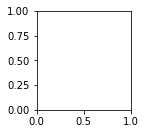

In [39]:
n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

(59, 11025)
